# **Análise Exploratória de Dados de Plataformas de Streaming**

Nesse projeto vamos analisar os dados de dois conjuntos de dados:

[Amazon](https://github.com/carlos-eschholz/da-streaming/blob/6efb07bdbeb9b94f04f69dc854fb10f941539917/data/amazon_prime_titles.csv)

[Netflix](https://github.com/carlos-eschholz/da-streaming/blob/6efb07bdbeb9b94f04f69dc854fb10f941539917/data/netflix_titles.csv)

Vamos lá!



---



# **Preparando o ambiente**

In [1]:
import pandas as pd
import seaborn as sns

Usaremos o pacote pandas para ler os conjunto de dados.

In [2]:
df_netflix = pd.read_csv('data/netflix_titles.csv')  #cria o dataframe netflix

df_amazon = pd.read_csv('data/amazon_prime_titles.csv')  #cria o dataframe amazon

In [3]:
df_netflix.head() #tabela da netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_amazon.head()  #tabela da amazon

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...




---



# **Schema dos dados**

In [5]:
df_netflix.info() # informação dos dados da netflix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df_amazon.info()  # informação dos dados da amazon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


Observamos que ambos possuem as mesmas colunas e algumas têm dados faltantes e a maioria não estão em seu formato ideal, como por exemplo a coluna 'date_added' que esta como object e não como data!



---



# **Unindo os dataframes**

Como os dataframes possuiem as mesmas colunas o que vamos fazer é unir os dois sem uma ordem lógica, simplesmente um depois o outro! Mas para diferencia-los vamos criar uma coluna chamada 'plataforma' e assim diferenciar um do outro.

In [7]:
df_netflix['plataforma'] = ['netflix'] * 8807 #criando uma coluna nova no dataframe netflix

df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  plataforma    8807 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB


In [8]:
df_amazon['plataforma'] = ['amazon'] * 9668 #agora é a vez do amazon

df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
 12  plataforma    9668 non-null   object
dtypes: int64(1), object(12)
memory usage: 982.0+ KB


Usei como referência de valor as informação obtidas no passo anterior.

In [9]:
plataformas_df = pd.concat([df_amazon, df_netflix]).reset_index(drop=True)  #unindo os dataframes em um novo chamado plataformas

Schema do novo dataframe

In [10]:
plataformas_df.head() #inicio do df plataformas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,amazon
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,amazon
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,amazon
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",amazon
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,amazon


In [11]:
plataformas_df.tail() #final do df plataformas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
18470,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",netflix
18471,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",netflix
18472,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,netflix
18473,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",netflix
18474,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,netflix


In [12]:
plataformas_df.info() #schema do df plataformas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18475 entries, 0 to 18474
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       18475 non-null  object
 1   type          18475 non-null  object
 2   title         18475 non-null  object
 3   director      13759 non-null  object
 4   cast          16417 non-null  object
 5   country       8648 non-null   object
 6   date_added    8952 non-null   object
 7   release_year  18475 non-null  int64 
 8   rating        18134 non-null  object
 9   duration      18472 non-null  object
 10  listed_in     18475 non-null  object
 11  description   18475 non-null  object
 12  plataforma    18475 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.8+ MB




---



# **Análise de dados**

**Vamos descobrir quais são os dez atores com mais atuações?**

In [13]:
lista = list(plataformas_df['cast']) #cria uma lista com os dados da coluna 'cast'

lista = str(lista).strip('[]').replace("'","").replace("|","")  #cria um texto com os dados e depois "limpa" os caracteres que não vamos usar

atores = lista.split(sep=',') #cria uma lista com os nomes individuais

print(len(atores)) #mostrar a quantidade de atores na lista

110551


Como a coluna 'cast' era formada por conjuntos de atores o que fizemos ali foi separar os atores para fazer a classificação!

In [14]:
top_10 = pd.DataFrame(atores, columns =  ['atores']) #cria uma variavel com os valores obtidos acima
top_10 = top_10.value_counts().reset_index() #cria uma coluna com a contagem dos atores

print(top_10)

                  atores     0
0                    nan  2058
1            Anupam Kher    59
2         Maggie Binkley    56
3       Amitabh Bachchan    47
4         Shah Rukh Khan    46
...                  ...   ...
61516     Isabela Merced     1
61517     Isabela Souzza     1
61518    Isabela Trannin     1
61519     Isabella Amara     1
61520    Brendan Gleeson     1

[61521 rows x 2 columns]


Fizemos a contagem mas o ator que mais apareceu foi o nan! Vamos consertar!

In [15]:
top_10 = top_10.drop(0) #remove o nan
top_10.columns = ['nome','qtd'] #muda o nome das colunas

print(top_10)

                    nome  qtd
1            Anupam Kher   59
2         Maggie Binkley   56
3       Amitabh Bachchan   47
4         Shah Rukh Khan   46
5                 Nassar   43
...                  ...  ...
61516     Isabela Merced    1
61517     Isabela Souzza    1
61518    Isabela Trannin    1
61519     Isabella Amara    1
61520    Brendan Gleeson    1

[61520 rows x 2 columns]


Agora ficou bom! Vamos separar os dez primeiros

In [16]:
top_10_actor = top_10.loc[0:11] #seleciona os 11 primeiros pois havia um caractere entre os 10

print(top_10_actor)

                 nome  qtd
1         Anupam Kher   59
2      Maggie Binkley   56
3    Amitabh Bachchan   47
4      Shah Rukh Khan   46
5              Nassar   43
6        Akshay Kumar   39
7    Naseeruddin Shah   39
8        Paresh Rawal   39
9         Danny Trejo   37
10                  1   35
11            Om Puri   35


Agora apareceu o ator 1! Vamos remover.

In [17]:
top_10_actor = top_10_actor.drop(10).reset_index(drop=True) # removi o "1" e arrumei o index

print(top_10_actor)

                nome  qtd
0        Anupam Kher   59
1     Maggie Binkley   56
2   Amitabh Bachchan   47
3     Shah Rukh Khan   46
4             Nassar   43
5       Akshay Kumar   39
6   Naseeruddin Shah   39
7       Paresh Rawal   39
8        Danny Trejo   37
9            Om Puri   35


Agora temos os dez atores com maiores participações!

Com o pacote seaborn vamos fazer um gráfico.

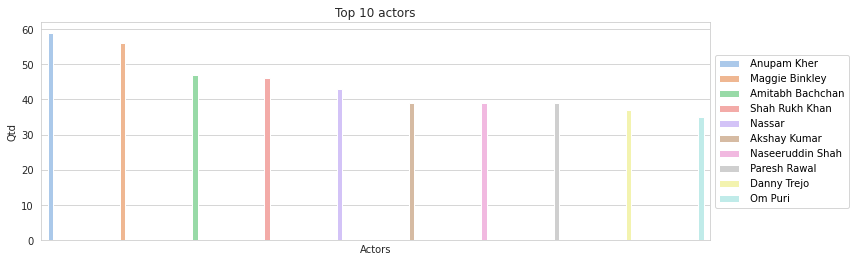

In [18]:
with sns.axes_style('whitegrid'): #adiciona a grade
    grafico_1 = sns.barplot(data=top_10_actor,x='nome',y='qtd',hue='nome',palette='pastel') #cria o gráfico
    grafico_1.set(title='Top 10 actors', xlabel='Actors', ylabel='Qtd') #modifica os nomes das retas e título
    grafico_1.set_xticks([]) #remove os nomes dos atores do eixo x para não poluir o gráfico

grafico_1.legend(loc='center left', bbox_to_anchor=(1, 0.5))  #cria a legenda ao lado do gráfico
grafico_1.figure.set_figwidth(12) #aumenta a largura do gráfico

Um gráfico para melhor visualização!



---



**Quais são os países com maior número de produções?**

Para isso separei a coluna 'country' para fazer a análise.

In [19]:
top_5_country = plataformas_df['country'].value_counts().reset_index(0) #separa a coluna desejada e cria uma auxiliar

top_5_country =  top_5_country.loc[0:4] #separa os 5 primeiros países

top_5_country.columns = ['country','qtd_filmes'] #arruma os nomes das colunas

print(top_5_country)

          country  qtd_filmes
0   United States        3071
1           India        1201
2  United Kingdom         447
3           Japan         247
4     South Korea         199


E com isso temos os cinco campeões de produção!

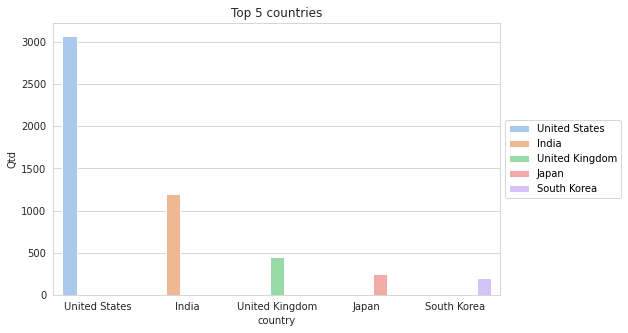

In [20]:
with sns.axes_style('whitegrid'): 
    grafico_2 = sns.barplot(data=top_5_country,x='country',y='qtd_filmes',hue='country', palette='pastel')
    grafico_2.set(title='Top 5 countries', xlabel='country', ylabel='Qtd')

grafico_2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
grafico_2.figure.set_figwidth(8)
grafico_2.figure.set_figheight(5) #aumenta a altra do gráfico

Gráfico para melhor visualizar.



---



**Qual o mês com maior quantidade de lançamento de filmes na netflix?**

Para isso vamos usar o dataframe netflix!

Mas antes temos que tratar a coluna 'date_added' para facilitar nossa análise.

In [21]:
max_date_added = df_netflix.query('type != "TV Show"') # cria uma variavel somente filmes do df netflix

max_date_added['date_added'] = pd.to_datetime(df_netflix.date_added)  #informa que a coluna é do tipo date

max_date_added['date_added'] = max_date_added['date_added'].dt.strftime('%m/%Y')  #retira o dia para ficarmos com o mês

max_date_added['date_added'].value_counts() #faz a contagem

C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_8268/290038845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_date_added['date_added'] = pd.to_datetime(df_netflix.date_added)  #informa que a coluna é do tipo date
C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_8268/290038845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_date_added['date_added'] = max_date_added['date_added'].dt.strftime('%m/%Y')  #retira o dia para ficarmos com o mês


11/2019    187
07/2021    169
12/2019    168
01/2020    152
10/2018    146
          ... 
04/2014      1
07/2014      1
08/2014      1
09/2014      1
06/2014      1
Name: date_added, Length: 105, dtype: int64

O mês de novembro de 2019  foi o  campeão com 187 lançamentos!

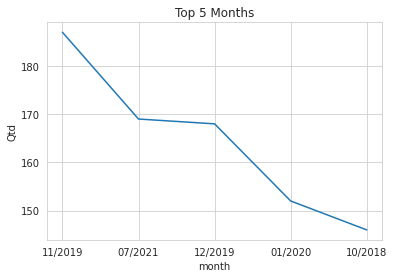

In [22]:
top_5_months = max_date_added['date_added'].value_counts().reset_index(0)
top_5_months =  top_5_months.loc[0:4]
top_5_months.columns = ['date','qtd_releases']

with sns.axes_style('whitegrid'): 
    grafico_3 = sns.lineplot(data=top_5_months,x='date',y='qtd_releases', palette='pastel')
    grafico_3.set(title='Top 5 Months', xlabel='month', ylabel='Qtd')



---



**Quantos filmes de comédia têm disponível?**

Vamos descobrir separando os filmes do nosso dataframe plataformas!

In [23]:
comedy = plataformas_df.query('type != "TV Show"')  #separa o que não é 'TV Show'

comedy = plataformas_df.query('listed_in.str.contains("Comedy")') #separa os que contém 'Comedy' em seu texto

comedy['listed_in'].value_counts().sum()#faz a contagem!

2498

Temos 2498 filmes de comedia dispoíveis!



---



**Quantos gêneros tem a nossa disposição?**

Vamos separar os filmes e contar os gêneros!

In [24]:
genero = plataformas_df.query('type == "Movie"')  #replica o df mas somente com os filmes

genero = genero['listed_in']  #restringe a variável a somente a coluna 'listed_in'

genero_list = list(set(genero)) #remove duplicatas

print("O total de gêneros é:",len(genero_list)) #insight

O total de gêneros é: 715




---



**Quantos filmes e séries temos nos catálogos?**

Para isso vamos seprar a coluna 'type' do df plataformas e vamos comparar um com o outro!

In [25]:
frequency = plataformas_df['type'].value_counts() #separa os filmes e séries

print(frequency)

frequency_per = plataformas_df['type'].value_counts(normalize=True).round(2)  #tira o percentual

print(frequency_per)

Movie      13945
TV Show     4530
Name: type, dtype: int64
Movie      0.75
TV Show    0.25
Name: type, dtype: float64


Temos 13945 filmes e 4530 séries no total!



---



Agora vamos fazer o mesmo com o df netflix e comprarar com o total.

In [26]:
f_netflix = df_netflix['type'].value_counts() 

print(f_netflix)

c_netflix = (f_netflix / frequency).round(2)

print(c_netflix)

Movie      6131
TV Show    2676
Name: type, dtype: int64
Movie      0.44
TV Show    0.59
Name: type, dtype: float64


Temos 6131 filmes e 2676 séries na netflix que representam 44% e 59% respectivamente do total.



---



Vez do df amazon!

In [27]:
f_amazon = df_amazon['type'].value_counts()

print(f_amazon)

c_amazon = (f_amazon / frequency).round(2)

print(c_amazon)

Movie      7814
TV Show    1854
Name: type, dtype: int64
Movie      0.56
TV Show    0.41
Name: type, dtype: float64


Temos 7814 filmes e 1856 séries na amazon que representam 56% e 41% respectivamente do total.



---



Vamos ver nos gráficos pra ficar melhor:

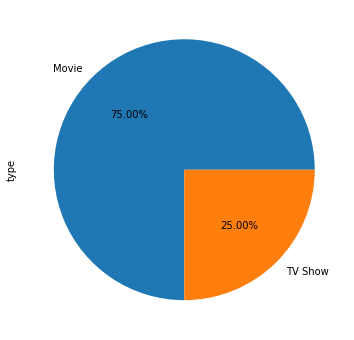

In [28]:
frequency_per.plot.pie(y='type', figsize=(11, 6), autopct='%.2f%%')
grafico_4 = sns.lineplot()


Total

<AxesSubplot:ylabel='type'>

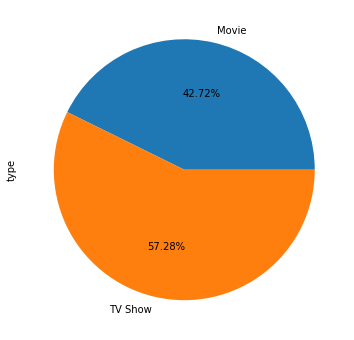

In [29]:
c_netflix.plot.pie(y='type', figsize=(11, 6), autopct='%.2f%%')

Netflix x total

<AxesSubplot:ylabel='type'>

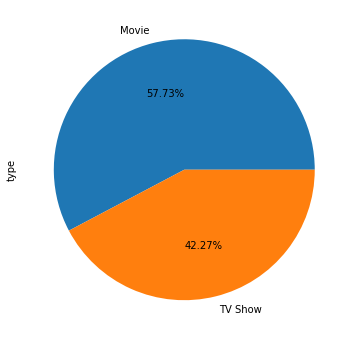

In [30]:
c_amazon.plot.pie(y='type', figsize=(11, 6), autopct='%.2f%%')

Amazon x total



---



#**Conclusão:**

Com essa análise fizemos:

10 atores com maior participação:

*   Anupam Kher, 59
*   Maggie Binkley, 56
*   Amitabh Bachchan, 47
*   Shah Rukh Khan, 46
*   Nassar, 43
*   Akshay Kumar, 39
*   Naseeruddin Shah, 39
*   Paresh Rawal, 39
*   Danny Trejo, 37
*   Om Puri, 35

5 países com maiores produções:

*   United States, 3071
*   India, 1201
*   United Kingdom, 447
*   Japan, 247
*   South Korea, 199

Mês com maior lançamento de filmes:

*   11/2019, 187

Total de filmes de comêdia:

*   2498

Total de gêneros disponíveis:

*   715

Quantida de filmes e séries no total:

*   Movie, 13945
*   TV Show, 4530

Quantidade na plataforma Netflix:

*   Movie, 6131
*   TV Show, 2676

Quantidade na platafoma Amazon:

*   Movie, 7814
*   TV Show, 1854